In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression


In [2]:
# Load the dataset
data_path = 'm1_final.csv'
df = pd.read_csv(data_path)


print(df.head())


   MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER TAIL_NUM DEST  \
0     11             1            5                B6   N828JB  CHS   
1     11             1            5                B6   N992JB  LAX   
2     11             1            5                B6   N959JB  FLL   
3     11             1            5                B6   N999JQ  MCO   
4     11             1            5                DL   N880DN  ATL   

   DEP_DELAY  CRS_ELAPSED_TIME  DISTANCE  CRS_DEP_M  ...  Dew Point  Humidity  \
0         -1               124       636        324  ...         34        58   
1         -7               371      2475        340  ...         34        58   
2         40               181      1069        301  ...         34        58   
3         -2               168       944        345  ...         34        58   
4         -4               139       760        360  ...         32        58   

   Wind Wind Speed  Wind Gust Pressure     Condition  sch_dep  sch_arr  \
0     W     

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [4]:
df["Condition"].value_counts()

Mostly Cloudy            9124
Fair                     5038
Cloudy                   4992
Partly Cloudy            3209
Light Rain               1865
Mostly Cloudy / Windy    1442
Fair / Windy              918
Partly Cloudy / Windy     582
Rain                      351
Cloudy / Windy            341
Light Rain / Windy        288
Light Drizzle             194
Fog                       147
Wintry Mix                 83
Light Snow                 76
Heavy Rain                 54
Fog / Windy                28
Rain / Windy               25
Light Snow / Windy         24
Light Drizzle / Windy      18
Heavy Rain / Windy          6
Drizzle and Fog             5
Light Freezing Rain         4
Wintry Mix / Windy          4
Snow                        2
Name: Condition, dtype: int64

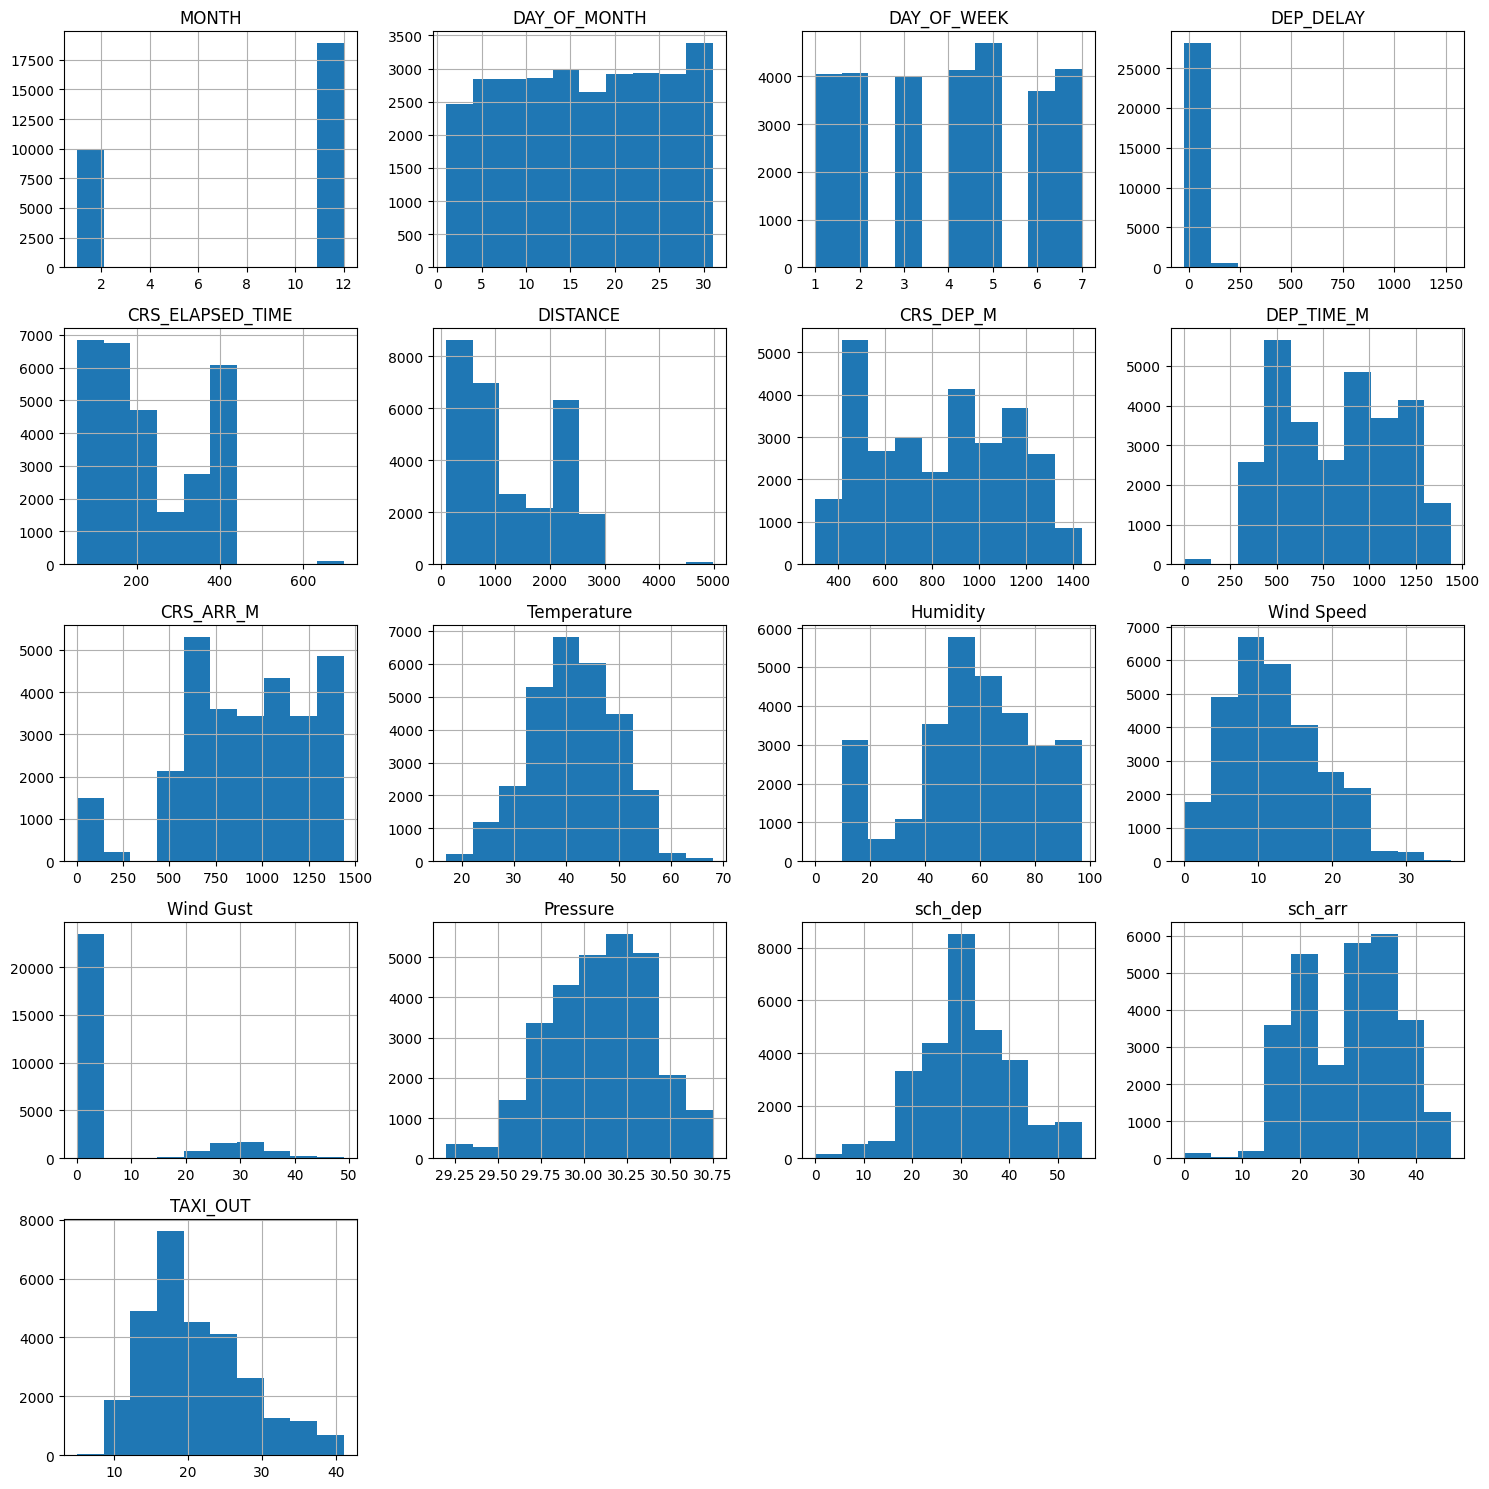

In [5]:
# Create histograms for the features in the dataset
df.hist(figsize=(15, 15))
plt.tight_layout()
plt.show()


TypeError: Vertical orientation requires numeric `y` variable.

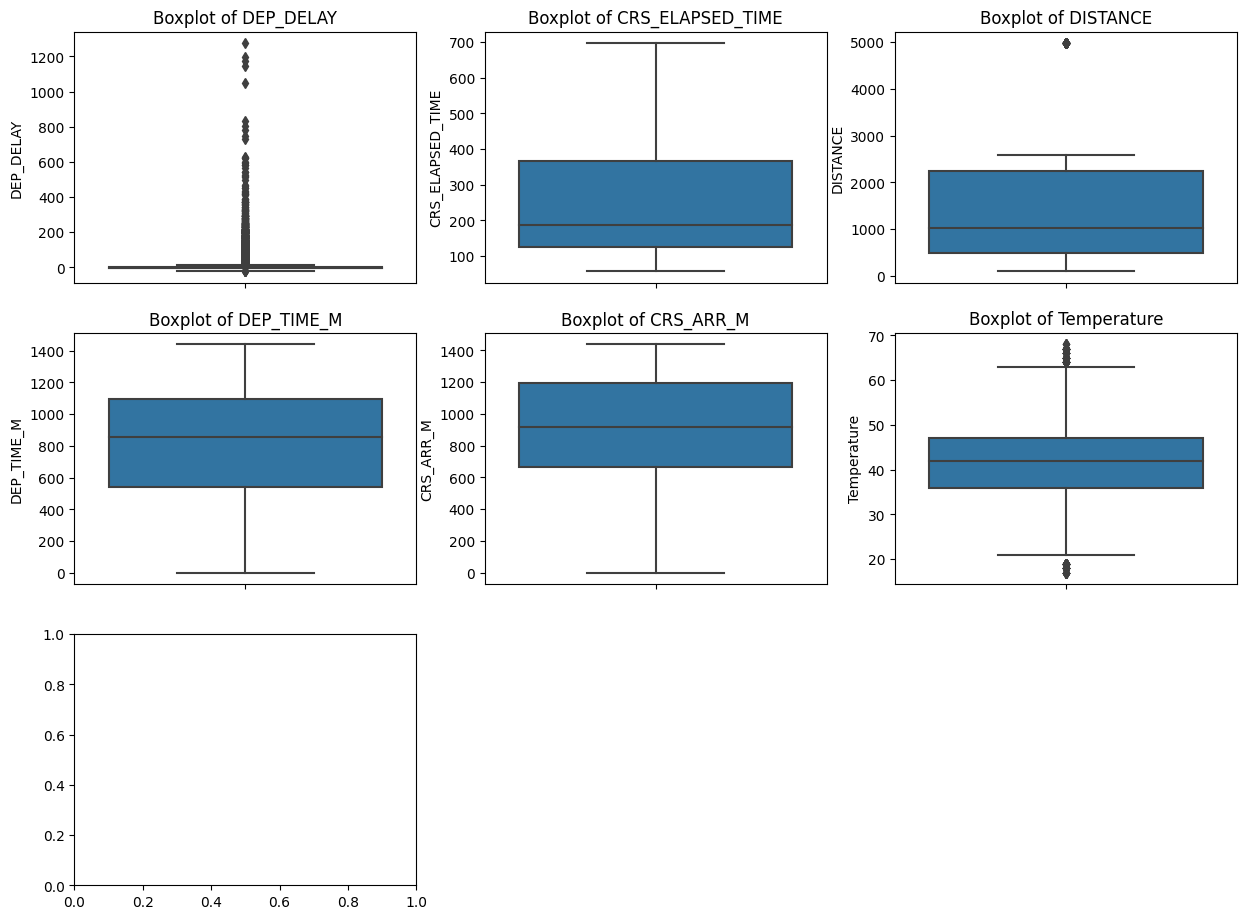

In [6]:
# Create a list of numerical features to create boxplots for
numerical_features = ['DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew Point', 'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure', 'TAXI_OUT']

# Create boxplots for the numerical features
plt.figure(figsize=(15, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df, y=feature)
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


Top 10 most visited destinations:
LAX    2974
SFO    1678
BOS    1243
FLL    1008
MCO     947
MIA     881
BUF     869
SJU     796
ATL     795
CLT     792
Name: DEST, dtype: int64


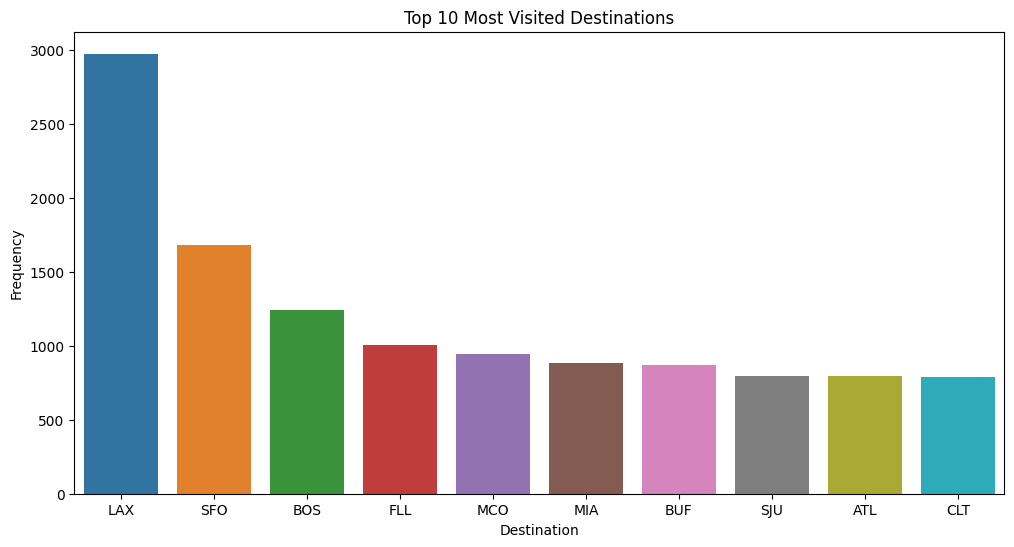

In [8]:
# Find the frequencies of the top 10 most visited destinations
top_destinations = df['DEST'].value_counts().head(10)

# Print the top 10 most visited destinations and their frequencies
print("Top 10 most visited destinations:")
print(top_destinations)

# Plot the top 10 most visited destinations and their frequencies
plt.figure(figsize=(12, 6))
sns.barplot(x=top_destinations.index, y=top_destinations.values)
plt.title("Top 10 Most Visited Destinations")
plt.xlabel("Destination")
plt.ylabel("Frequency")
plt.show()



C:\Users\44738\AppData\Local\Temp\ipykernel_27336\3554723052.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[numerical_features].corr()


                  DEP_DELAY  CRS_ELAPSED_TIME  DISTANCE  DEP_TIME_M  \
DEP_DELAY          1.000000         -0.030871 -0.031507    0.072340   
CRS_ELAPSED_TIME  -0.030871          1.000000  0.994465   -0.021391   
DISTANCE          -0.031507          0.994465  1.000000   -0.034604   
DEP_TIME_M         0.072340         -0.021391 -0.034604    1.000000   
CRS_ARR_M          0.043691          0.035186  0.008520    0.469758   
Temperature       -0.032261         -0.016050 -0.009923    0.098105   
Humidity          -0.011776          0.017198  0.015110   -0.005923   
Wind Speed         0.067718         -0.013440 -0.010734    0.006033   
Wind Gust          0.044340         -0.011934 -0.009522   -0.014336   
Pressure          -0.064939          0.010165  0.005692   -0.009410   
TAXI_OUT           0.034881          0.070838  0.059856    0.057896   

                  CRS_ARR_M  Temperature  Humidity  Wind Speed  Wind Gust  \
DEP_DELAY          0.043691    -0.032261 -0.011776    0.067718   0.044

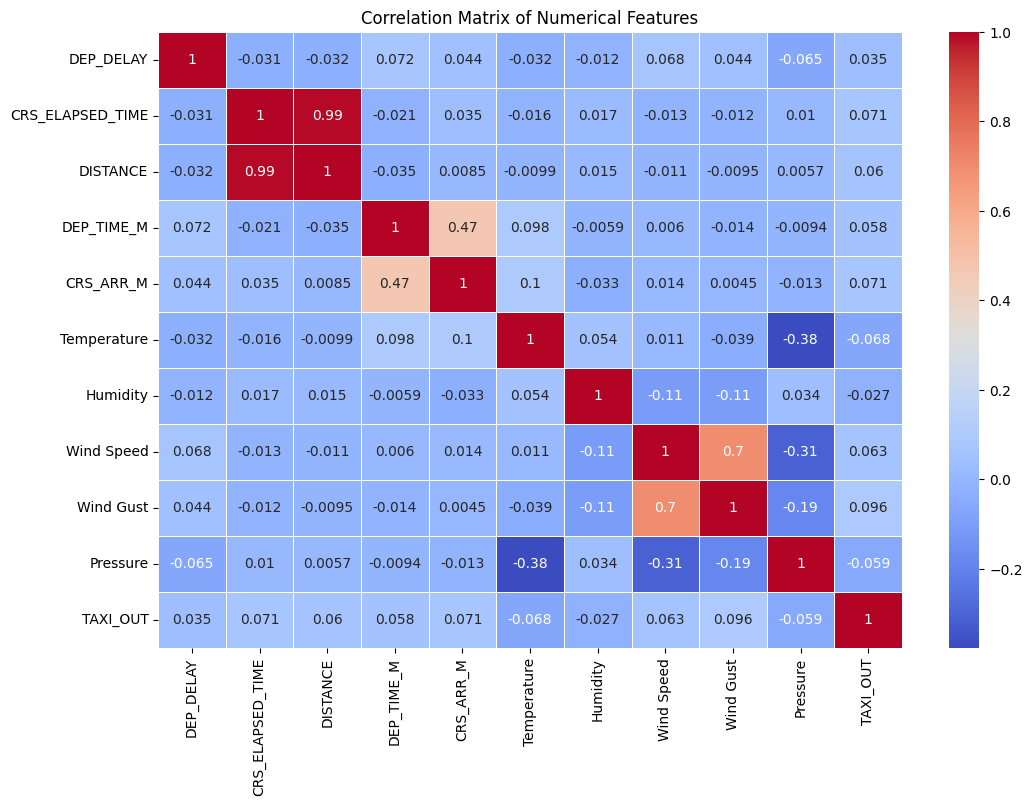

In [10]:
# Compute the correlation matrix
corr_matrix = df[numerical_features].corr()

# Print the correlation matrix
print(corr_matrix)
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [11]:
# Check for missing data
missing_data = df.isnull().sum()

# Print the count of missing data for each feature
print("Count of missing data for each feature:")
print(missing_data)


Count of missing data for each feature:
MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64


In [12]:
# Calculate the mode of the 'Wind' feature
wind_mode = df['Wind'].mode().iloc[0]

# Fill the missing values in the 'Wind' feature with the mode
df['Wind'].fillna(wind_mode, inplace=True)

# Check for missing data again to confirm the imputation
missing_data_updated = df.isnull().sum()
print("Updated count of missing data for each feature:")
print(missing_data_updated)


Updated count of missing data for each feature:
MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 0
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64


In [13]:
# Assuming 'X' contains the feature values and 'y' contains the target values
X = df.drop('TAXI_OUT', axis=1)  # Replace with the appropriate columns to exclude the target variable
y = df['TAXI_OUT']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The test set is now 20% of the entire dataset, and the training set is the remaining 80%.


In [14]:
# Specify the X and y variables
feature_columns = ['Wind Speed', 'Temperature', 'Humidity', 'Pressure'] 
X = df[feature_columns].values
y = df['DEP_DELAY'].values.reshape(-1, 1)

# Train, test, and split the data; test size is 30%, 70% is for training
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=32)


In [17]:
print("X_Train size is:",X_train.shape)
print("X_Test size is:",X_test.shape)
print("Y_train size is:",Y_train.shape)
print("Y_Test size is:",Y_test.shape)

X_Train size is: (20174, 4)
X_Test size is: (8646, 4)
Y_train size is: (20174, 1)
Y_Test size is: (8646, 1)


In [18]:
linear_regressor = LinearRegression()  # create a linear regression object
linear_regressor.fit(X_train, Y_train)  # perform the linear regression

LinearRegression()

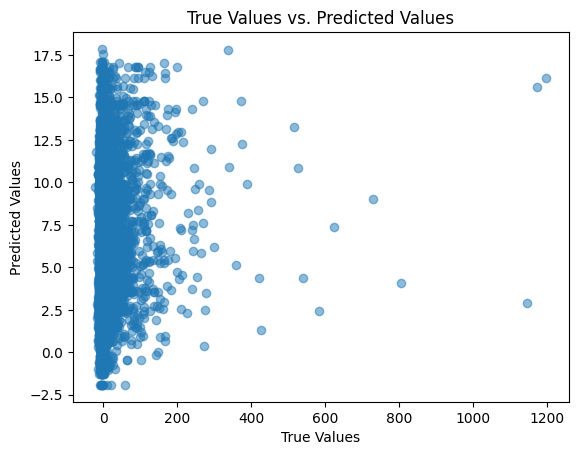

In [21]:
Y_pred = linear_regressor.predict(X_test)


# Make predictions using the test data
Y_pred = linear_regressor.predict(X_test)

# Create a scatter plot of the true target values vs. the predicted values
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values')

plt.show()


In [22]:
# Create a DataFrame with columns for the true target values and the predicted values
predictions_df = pd.DataFrame({'True Values': Y_test.flatten(), 'Predicted Values': Y_pred.flatten()})

# Display the DataFrame
print(predictions_df.head())


   True Values  Predicted Values
0           -8          7.276509
1           21         12.296863
2           -4         10.403728
3           -7         12.532346
4            1          2.288121


In [23]:
print('MAE:', metrics.mean_absolute_error(Y_test.reshape(-1), Y_pred.reshape(-1)))
print('MSE:', metrics.mean_squared_error(Y_test.reshape(-1), Y_pred.reshape(-1)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test.reshape(-1), Y_pred.reshape(-1))))
print('R2:', metrics.r2_score(Y_test.reshape(-1), Y_pred.reshape(-1)))

MAE: 16.636309425586514
MSE: 1676.3329425560023
RMSE: 40.94304510604948
R2: 0.009375607865021118
